In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train = (X_train.astype("float32") / 255).reshape(X_train.shape[0], 28, 28, 1)
X_test = (X_test.astype("float32") / 255).reshape(X_test.shape[0], 28, 28, 1)

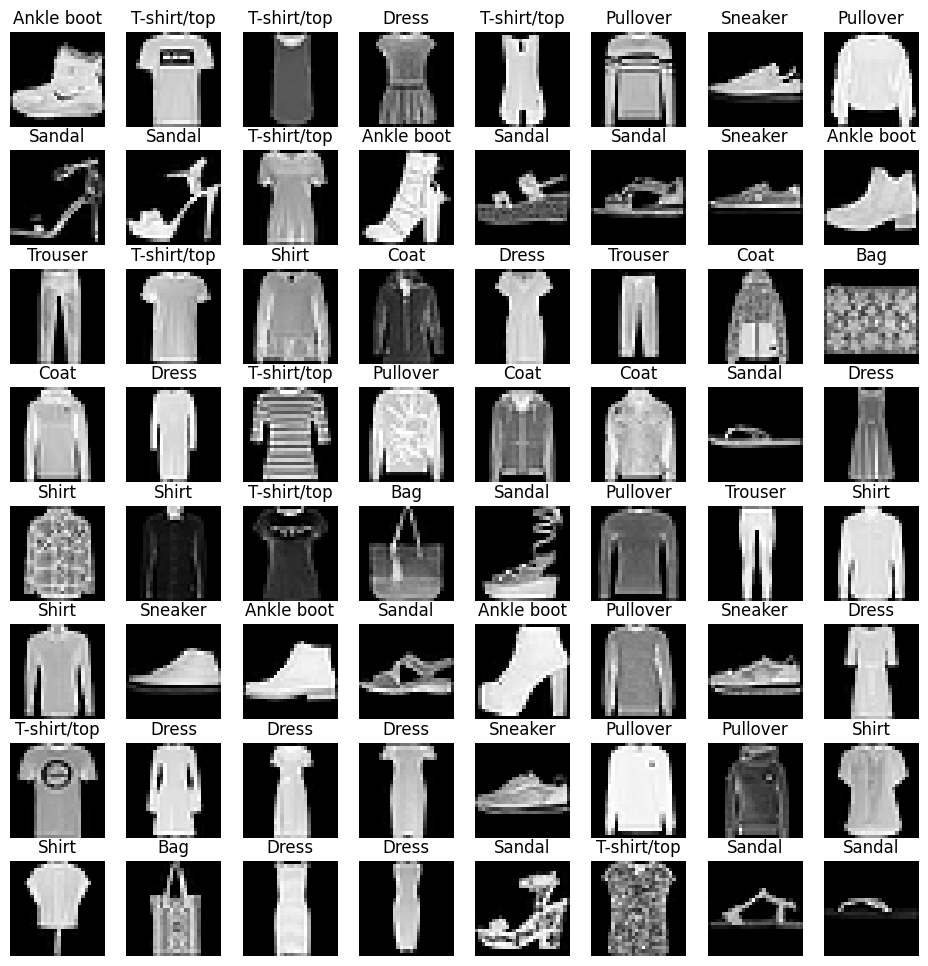

In [3]:
description = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(12, 12))
ax = [fig.add_subplot(8, 8, i+1) for i in range(8*8)]

for i, a in enumerate(ax):
    a.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    a.set_aspect('equal')
    a.set_title(description[y_train[i]])
    a.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.25)

plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dg = ImageDataGenerator(width_shift_range=0.2)

dg.fit(X_train)

itr = dg.flow(X_train, y_train, batch_size=X_train.shape[0], shuffle=True)

X, y = itr.next()

X_train = np.concatenate((X_train, X), axis=0)
y_train = np.concatenate((y_train, y))

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
y_train = to_categorical(y_train).astype('float32')
y_test = to_categorical(y_test).astype('float32')

NameError: name 'to_categorical' is not defined

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

NameError: name 'train_test_split' is not defined

In [7]:
X_train_flatten = np.array([i.flatten() for i in X_train])
X_val_flatten = np.array([i.flatten() for i in X_val])

simple_neural_network = Sequential()

simple_neural_network.add(Dense(200, input_shape=(784, ), activation='relu'))
simple_neural_network.add(Dense(200, activation='relu'))
simple_neural_network.add(Dense(10, activation='softmax'))

simple_neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

simple_neural_network_history = simple_neural_network.fit(X_train_flatten, y_train, batch_size=100, epochs=20, validation_data=(X_val_flatten, y_val))

Epoch 1/20
804/804 [==============================] - 5s 5ms/step - loss: 0.1078 - accuracy: 0.7794 - val_loss: 0.0837 - val_accuracy: 0.8298
Epoch 2/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0776 - accuracy: 0.8394 - val_loss: 0.0759 - val_accuracy: 0.8413
Epoch 3/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0695 - accuracy: 0.8562 - val_loss: 0.0717 - val_accuracy: 0.8515
Epoch 4/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0651 - accuracy: 0.8653 - val_loss: 0.0704 - val_accuracy: 0.8544
Epoch 5/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0617 - accuracy: 0.8729 - val_loss: 0.0663 - val_accuracy: 0.8628
Epoch 6/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0588 - accuracy: 0.8790 - val_loss: 0.0662 - val_accuracy: 0.8618
Epoch 7/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0563 - accuracy: 0.8834 - val_loss: 0.0681 - val_accuracy: 0.8602
Epoch 

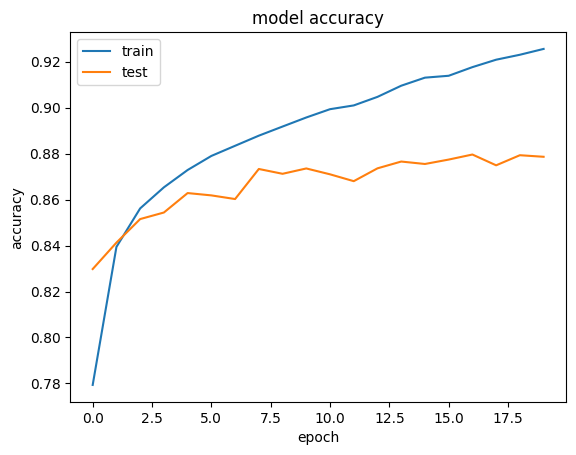

In [8]:
plt.plot(simple_neural_network_history.history['accuracy'])
plt.plot(simple_neural_network_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

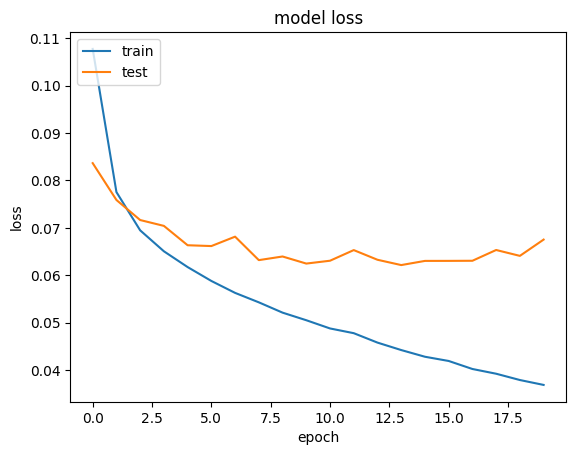

In [9]:
plt.plot(simple_neural_network_history.history['loss'])
plt.plot(simple_neural_network_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
def single_layer():
    single_layer_conv = Sequential()

    single_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
    single_layer_conv.add(MaxPooling2D())
    single_layer_conv.add(Flatten())

    single_layer_conv.add(Dense(200, activation='relu'))
    single_layer_conv.add(Dense(10, activation='softmax'))

    single_layer_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return single_layer_conv

In [11]:
filepath='modelsave/model1/model1.h5'

mc = ModelCheckpoint(filepath=filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

single_layer_conv = single_layer()

single_layer_conv_history = single_layer_conv.fit(X_train, y_train, batch_size=100,
                                                    epochs=20, validation_data=(X_val, y_val), callbacks=[mc])


single_layer_conv = single_layer()
single_layer_conv.load_weights(filepath)

loss, acc = single_layer_conv.evaluate(X_val, y_val, verbose=2)
print(f"Single layer validation accuracy and loss: {100*acc:5.2f}%, {100*loss:5.2f}%")

Epoch 1/20
804/804 [==============================] - 8s 5ms/step - loss: 0.0971 - accuracy: 0.8084 - val_loss: 0.0753 - val_accuracy: 0.8468
Epoch 2/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0654 - accuracy: 0.8726 - val_loss: 0.0630 - val_accuracy: 0.8760
Epoch 3/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0564 - accuracy: 0.8905 - val_loss: 0.0585 - val_accuracy: 0.8844
Epoch 4/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0503 - accuracy: 0.9028 - val_loss: 0.0548 - val_accuracy: 0.8938
Epoch 5/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0457 - accuracy: 0.9127 - val_loss: 0.0529 - val_accuracy: 0.8969
Epoch 6/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0417 - accuracy: 0.9206 - val_loss: 0.0521 - val_accuracy: 0.8983
Epoch 7/20
804/804 [==============================] - 4s 5ms/step - loss: 0.0386 - accuracy: 0.9283 - val_loss: 0.0506 - val_accuracy: 0.9034
Epoch 

In [12]:
def two_layer():
    two_layer_conv = Sequential()

    two_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
    two_layer_conv.add(BatchNormalization())
    two_layer_conv.add(Conv2D(32, 3, activation='relu'))
    two_layer_conv.add(MaxPooling2D())
    two_layer_conv.add(BatchNormalization())

    two_layer_conv.add(Flatten())

    two_layer_conv.add(Dense(200, activation='relu'))
    two_layer_conv.add(Dense(10, activation='softmax'))

    two_layer_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return two_layer_conv

In [13]:
filepath='modelsave/model1/model2.h5'
mc = ModelCheckpoint(filepath=filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

two_layer_conv = two_layer()
two_layer_conv_history = two_layer_conv.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val), callbacks=[mc])

two_layer_conv = two_layer()
two_layer_conv.load_weights(filepath)

loss, acc = two_layer_conv.evaluate(X_val, y_val, verbose=2)
print(f"Two layer validation accuracy and loss: {100*acc:5.2f}%, {100*loss:5.2f}%")

Epoch 1/20
804/804 [==============================] - 6s 7ms/step - loss: 0.0723 - accuracy: 0.8599 - val_loss: 0.0680 - val_accuracy: 0.8646
Epoch 2/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0450 - accuracy: 0.9136 - val_loss: 0.0487 - val_accuracy: 0.9086
Epoch 3/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0342 - accuracy: 0.9365 - val_loss: 0.0499 - val_accuracy: 0.9079
Epoch 4/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0259 - accuracy: 0.9543 - val_loss: 0.0522 - val_accuracy: 0.9093
Epoch 5/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0198 - accuracy: 0.9665 - val_loss: 0.0546 - val_accuracy: 0.9176
Epoch 6/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0150 - accuracy: 0.9759 - val_loss: 0.0585 - val_accuracy: 0.9148
Epoch 7/20
804/804 [==============================] - 5s 7ms/step - loss: 0.0109 - accuracy: 0.9840 - val_loss: 0.0657 - val_accuracy: 0.9157
Epoch 

In [14]:
def three_layer():
    three_layer_conv = Sequential()

    three_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
    three_layer_conv.add(BatchNormalization())
    three_layer_conv.add(Conv2D(32, 3, activation='relu'))
    three_layer_conv.add(MaxPooling2D())
    three_layer_conv.add(BatchNormalization())

    three_layer_conv.add(Conv2D(64, 3, activation='relu'))
    three_layer_conv.add(MaxPooling2D())
    three_layer_conv.add(BatchNormalization())

    three_layer_conv.add(Flatten())

    three_layer_conv.add(Dense(200, activation='relu'))
    three_layer_conv.add(Dense(10, activation='softmax'))

    three_layer_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return three_layer_conv

In [15]:
filepath='modelsave/model1/model3.h5'
mc = ModelCheckpoint(filepath=filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

three_layer_conv = three_layer()
three_layer_conv_history = three_layer_conv.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val), callbacks=[mc])

three_layer_conv = three_layer()
three_layer_conv.load_weights(filepath)

loss, acc = three_layer_conv.evaluate(X_val, y_val, verbose=2)
print(f"Three layer validation accuracy and loss: {100*acc:5.2f}%, {100*loss:5.2f}%")

Epoch 1/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0743 - accuracy: 0.8529 - val_loss: 0.0621 - val_accuracy: 0.8736
Epoch 2/20
804/804 [==============================] - 6s 8ms/step - loss: 0.0483 - accuracy: 0.9048 - val_loss: 0.0468 - val_accuracy: 0.9072
Epoch 3/20
804/804 [==============================] - 6s 7ms/step - loss: 0.0388 - accuracy: 0.9243 - val_loss: 0.0499 - val_accuracy: 0.9040
Epoch 4/20
804/804 [==============================] - 6s 8ms/step - loss: 0.0325 - accuracy: 0.9393 - val_loss: 0.0446 - val_accuracy: 0.9160
Epoch 5/20
804/804 [==============================] - 6s 8ms/step - loss: 0.0267 - accuracy: 0.9513 - val_loss: 0.0451 - val_accuracy: 0.9188
Epoch 6/20
804/804 [==============================] - 6s 8ms/step - loss: 0.0214 - accuracy: 0.9630 - val_loss: 0.0499 - val_accuracy: 0.9141
Epoch 7/20
804/804 [==============================] - 6s 8ms/step - loss: 0.0170 - accuracy: 0.9727 - val_loss: 0.0464 - val_accuracy: 0.9224
Epoch 

In [16]:
def four_layer():
    four_layer_conv = Sequential()

    four_layer_conv.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
    four_layer_conv.add(BatchNormalization())
    four_layer_conv.add(Conv2D(32, 3, activation='relu'))
    four_layer_conv.add(MaxPooling2D())
    four_layer_conv.add(BatchNormalization())

    four_layer_conv.add(Conv2D(64, 3, activation='relu'))
    four_layer_conv.add(BatchNormalization())
    four_layer_conv.add(Conv2D(64, 3, activation='relu'))
    four_layer_conv.add(MaxPooling2D())
    four_layer_conv.add(BatchNormalization())

    four_layer_conv.add(Flatten())

    four_layer_conv.add(Dense(200, activation='relu'))
    four_layer_conv.add(Dense(10, activation='softmax'))

    four_layer_conv.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return four_layer_conv

In [17]:
filepath='modelsave/model1/model4.h5'
mc = ModelCheckpoint(filepath=filepath, save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True)

four_layer_conv = four_layer()
four_layer_conv_history = four_layer_conv.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_val, y_val), callbacks=[mc])

four_layer_conv = four_layer()
four_layer_conv.load_weights(filepath)

loss, acc = four_layer_conv.evaluate(X_val, y_val, verbose=2)
print(f"Four layer validation accuracy and loss: {100*acc:5.2f}%, {100*loss:5.2f}%")

Epoch 1/20
804/804 [==============================] - 7s 9ms/step - loss: 0.0746 - accuracy: 0.8517 - val_loss: 0.0569 - val_accuracy: 0.8886
Epoch 2/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0485 - accuracy: 0.9033 - val_loss: 0.0529 - val_accuracy: 0.8972
Epoch 3/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0407 - accuracy: 0.9204 - val_loss: 0.0643 - val_accuracy: 0.8684
Epoch 4/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0341 - accuracy: 0.9352 - val_loss: 0.0438 - val_accuracy: 0.9153
Epoch 5/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0290 - accuracy: 0.9457 - val_loss: 0.0439 - val_accuracy: 0.9198
Epoch 6/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0244 - accuracy: 0.9559 - val_loss: 0.0437 - val_accuracy: 0.9210
Epoch 7/20
804/804 [==============================] - 7s 8ms/step - loss: 0.0201 - accuracy: 0.9642 - val_loss: 0.0463 - val_accuracy: 0.9197
Epoch 

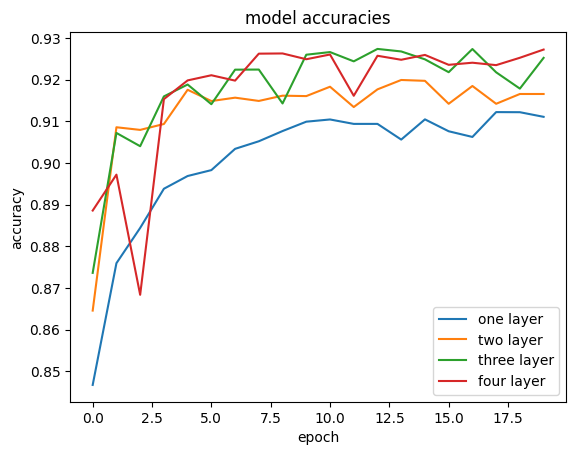

In [18]:
plt.plot(single_layer_conv_history.history['val_accuracy'])
plt.plot(two_layer_conv_history.history['val_accuracy'])
plt.plot(three_layer_conv_history.history['val_accuracy'])
plt.plot(four_layer_conv_history.history['val_accuracy'])
plt.title('model accuracies')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['one layer', 'two layer', 'three layer', 'four layer'], loc='lower right')
plt.show()

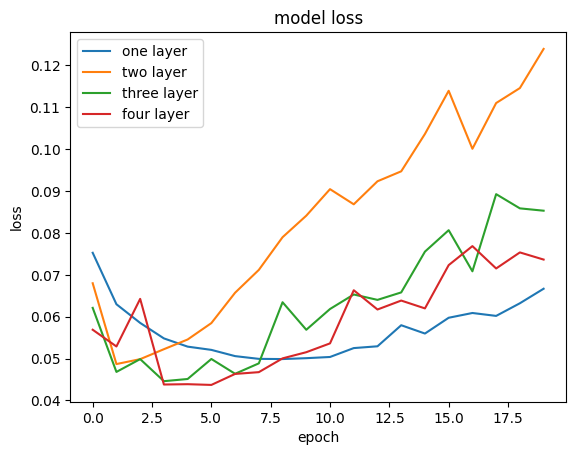

In [19]:
plt.plot(single_layer_conv_history.history['val_loss'])
plt.plot(two_layer_conv_history.history['val_loss'])
plt.plot(three_layer_conv_history.history['val_loss'])
plt.plot(four_layer_conv_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['one layer', 'two layer', 'three layer', 'four layer'], loc='upper left')
plt.show()

In [20]:
single_layer_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 200)               1081800   
                                                                 
 dense_6 (Dense)             (None, 10)                2010      
                                                                 
Total params: 1,084,130
Trainable params: 1,084,130
Non-trainable params: 0
____________________________________________

In [21]:
two_layer_conv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                      

In [22]:
three_layer_conv.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 12, 12, 32)       128       
 hNormalization)                                                 
                                                      

In [23]:
four_layer_conv.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 12, 12, 32)       128       
 chNormalization)                                                
                                                      

|Model|Convolutional layers|Parameters|Highest validation accuracy (%)|
|-|-|-|-|
|single_layer_conv|1|1084130|91.21|
|two_layer_conv|2|933634|91.98|
|three_layer_conv|3|350786|92.73|
|four_layer_conv|4|272770|92.71|

In [31]:
loss, acc = four_layer_conv.evaluate(X_test, y_test)
print(f'test accuracy: {100*acc:5.2f}%')
print(f'test loss: {100*loss:5.2f}%')

313/313 [==============================] - 1s 4ms/step - loss: 0.0926 - accuracy: 0.9198
test accuracy: 91.98%
test loss:  9.26%
